Project-COVID 19 Trend Analysis

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [54]:
data = pd.read_csv('/content/covid_19_clean_complete.csv')
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [55]:
data.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [57]:
data['Date']= pd.to_datetime(data["Date"])

In [58]:
data.rename(columns={'Province/State':'State','Country/Region':'Country'}, inplace = True)

In [59]:
#Cases on the last day
top = data[data['Date']==data['Date'].max()]
top

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [62]:
df=top.groupby('Country')['Confirmed','Recovered','Active','Deaths'].sum().reset_index()

<ipython-input-62-eae081643516>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [63]:
df

,Country,Confirmed,Recovered,Active,Deaths
0,Afghanistan,36263,25198,9796,1269
1,Albania,4880,2745,1991,144
2,Algeria,27973,18837,7973,1163
3,Andorra,907,803,52,52
4,Angola,950,242,667,41
...,...,...,...,...,...
182,West Bank and Gaza,10621,3752,6791,78
183,Western Sahara,10,8,1,1
184,Yemen,1691,833,375,483
185,Zambia,4552,2815,1597,140


In [70]:
data['Date']=pd.to_datetime(data['Date'])

data['Date']=data['Date'].dt.date

In [71]:
fig = px.choropleth(df,locations='Country',locationmode='country names',
                    color='Deaths',hover_name='Country',
                    range_color=[1,2000],color_continuous_scale='Peach',
                    title="Death cases Country wise")
fig.show()

In [102]:
fig = px.choropleth(data,locations='Country',locationmode='country names',
                    color='Active',hover_name='Country',
                    range_color=[1,2000],animation_frame='Date',color_continuous_scale='Peach',
                    title="Active cases Country wise")
fig.show()

In [ ]:
''' This animated figure shows how the number of COVID-19 cases changes over time.'''

In [76]:
## Bar plot

t_cases=data.groupby('Date')['Confirmed'].sum().reset_index()
t_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [77]:
t_20_top=top.groupby('Country')['Active'].sum().reset_index().sort_values(by='Active',ascending=False).head(20)

In [78]:
t_20_top.reset_index(inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'US'),
  Text(0, 1, 'Brazil'),
  Text(0, 2, 'India'),
  Text(0, 3, 'United Kingdom'),
  Text(0, 4, 'Russia'),
  Text(0, 5, 'South Africa'),
  Text(0, 6, 'Colombia'),
  Text(0, 7, 'France'),
  Text(0, 8, 'Canada'),
  Text(0, 9, 'Peru'),
  Text(0, 10, 'Bangladesh'),
  Text(0, 11, 'Spain'),
  Text(0, 12, 'Argentina'),
  Text(0, 13, 'Sweden'),
  Text(0, 14, 'Philippines'),
  Text(0, 15, 'Egypt'),
  Text(0, 16, 'Mexico'),
  Text(0, 17, 'Netherlands'),
  Text(0, 18, 'Bolivia'),
  Text(0, 19, 'Saudi Arabia')])

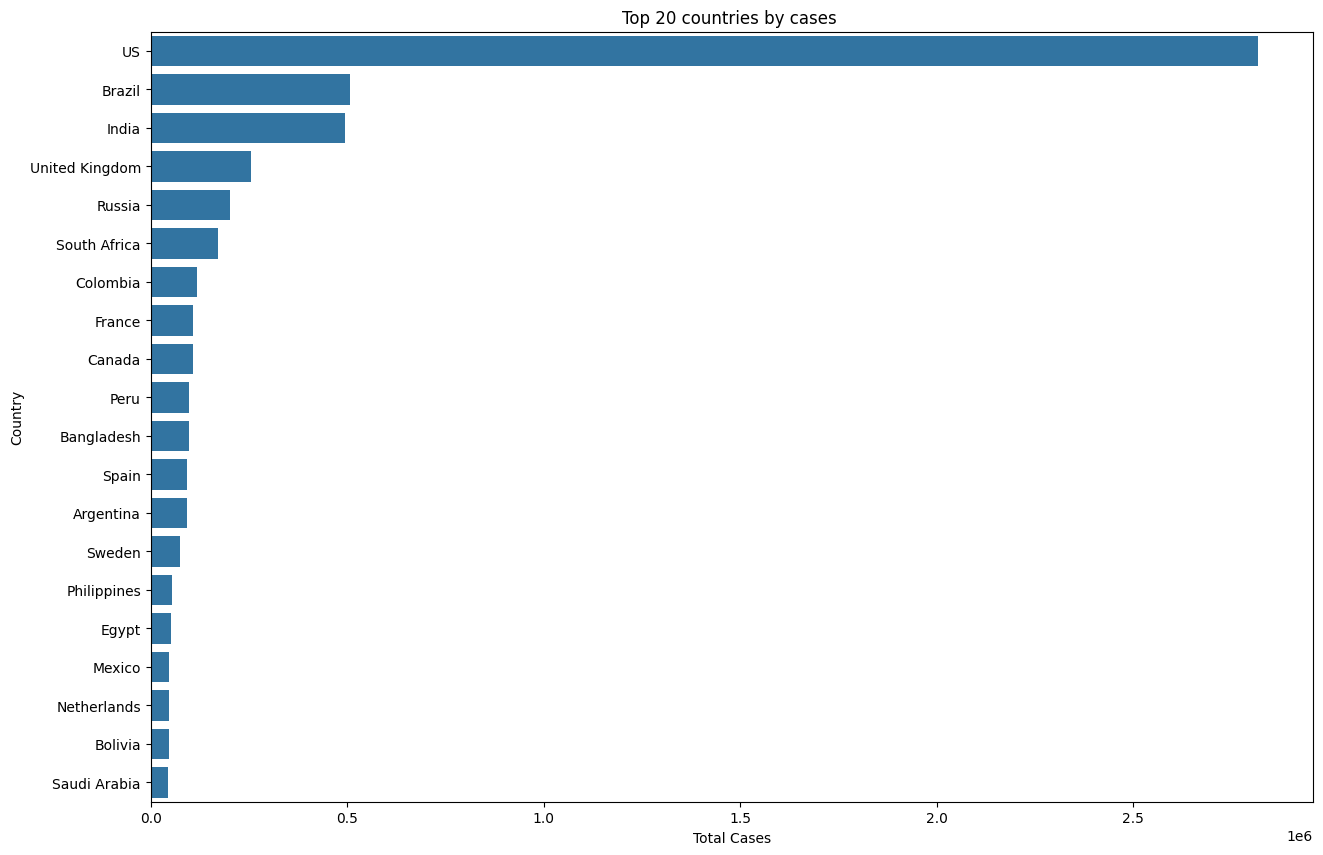

In [80]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries by cases ')

b=sns.barplot(x=t_20_top.Active,y=t_20_top.Country)

b.set(xlabel="Total Cases",ylabel='Country')

plt.xticks()
plt.yticks()


In [82]:
t_20_top=top.groupby('Country')['Recovered'].sum().reset_index().sort_values(by='Recovered',ascending=False).head(20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Brazil'),
  Text(0, 1, 'US'),
  Text(0, 2, 'India'),
  Text(0, 3, 'Russia'),
  Text(0, 4, 'Chile'),
  Text(0, 5, 'Mexico'),
  Text(0, 6, 'South Africa'),
  Text(0, 7, 'Peru'),
  Text(0, 8, 'Iran'),
  Text(0, 9, 'Pakistan'),
  Text(0, 10, 'Saudi Arabia'),
  Text(0, 11, 'Turkey'),
  Text(0, 12, 'Italy'),
  Text(0, 13, 'Germany'),
  Text(0, 14, 'Spain'),
  Text(0, 15, 'Colombia'),
  Text(0, 16, 'Bangladesh'),
  Text(0, 17, 'Qatar'),
  Text(0, 18, 'France'),
  Text(0, 19, 'China')])

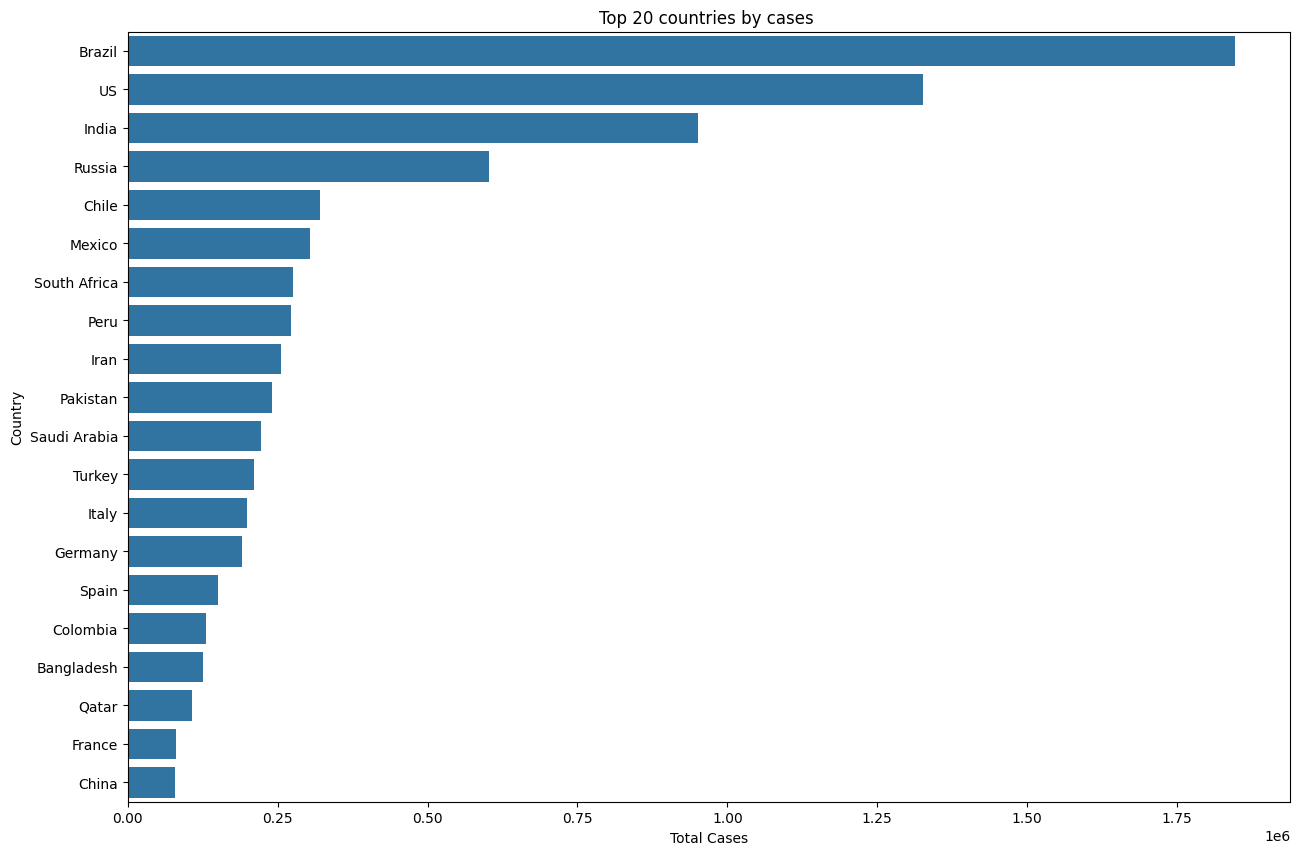

In [83]:

plt.figure(figsize=(15,10))
plt.title('Top 20 countries by cases ')

b=sns.barplot(x=t_20_top.Recovered,y=t_20_top.Country)

b.set(xlabel="Total Cases",ylabel='Country')

plt.xticks()
plt.yticks()


In [ ]:
''' This barplot shows the recovery rate from covid-19. Where Brazil is second highest country in active cases but its recovery rate is better than US and other countries.

In [84]:
confirmed = data.groupby('Date').sum()['Confirmed'].reset_index()
recovered = data.groupby('Date').sum()['Recovered'].reset_index()
deaths = data.groupby('Date').sum()['Deaths'].reset_index()

<ipython-input-84-931ff486e04e>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-84-931ff486e04e>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-84-931ff486e04e>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [87]:
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [92]:
from prophet import Prophet


In [95]:
confirmed.columns = ['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])

In [97]:
model = Prophet()
model.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ufss6xc/ytvt_z2q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ufss6xc/h36hy2ui.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91270', 'data', 'file=/tmp/tmp9ufss6xc/ytvt_z2q.json', 'init=/tmp/tmp9ufss6xc/h36hy2ui.json', 'output', 'file=/tmp/tmp9ufss6xc/prophet_modelyc7715zj/prophet_model-20240124105623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:56:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:56:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [98]:
future = model.make_future_dataframe(periods=7)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [99]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632020e+07,1.621862e+07,1.642964e+07
189,2020-07-29,1.652997e+07,1.641847e+07,1.663163e+07
190,2020-07-30,1.674391e+07,1.663072e+07,1.684814e+07
191,2020-07-31,1.695910e+07,1.685028e+07,1.706402e+07
192,2020-08-01,1.716676e+07,1.706020e+07,1.727826e+07
193,2020-08-02,1.736430e+07,1.725166e+07,1.747621e+07
194,2020-08-03,1.755889e+07,1.744179e+07,1.767920e+07


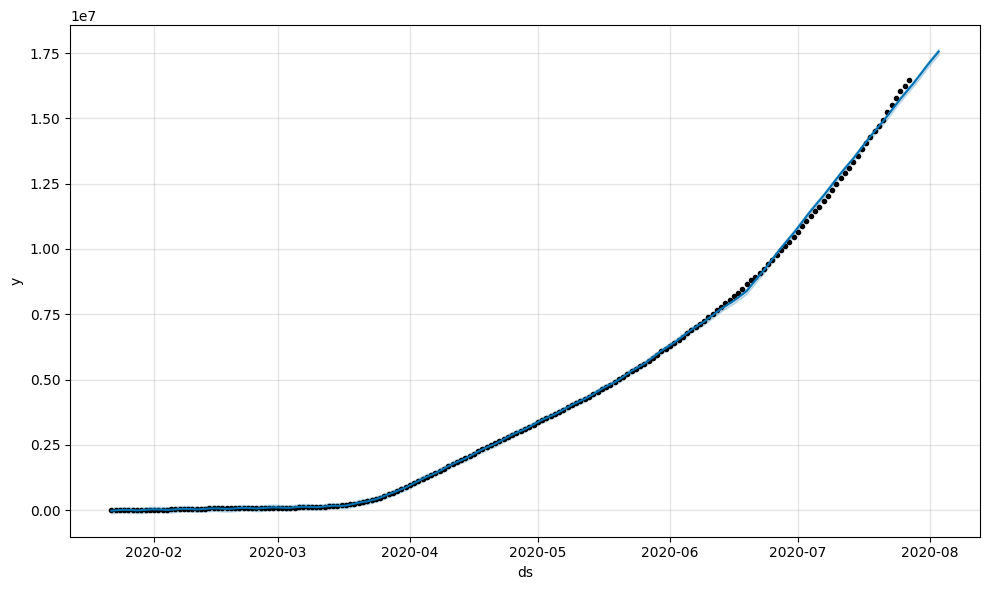

In [100]:
confirmed_forecast_plot = model.plot(forecast)

In [ ]:
'''This forecast represent the number of cases expected a week in a future. The blue line extended towards confirm cases in future.'''

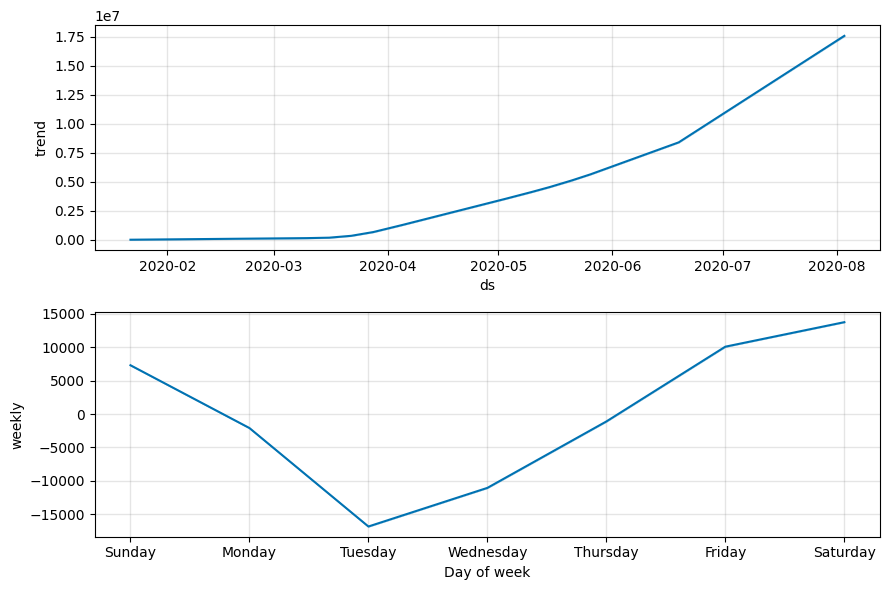

In [101]:
confirmed_forecast_plot=model.plot_components(forecast)